In [1]:
%matplotlib inline

In [2]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sc
import seaborn as sb
from matplotlib.pyplot import cm

In [3]:
sb.set_style("darkgrid",{"axes.facecolor":".9"})

In [4]:
features = pd.read_csv("/mnt/bkt_prd_dsv_brain_therapy_raw/Features/Focused_Attention//features_for_anova.csv")

In [5]:
features.head()

Participant Type  type_order context  context_order  ecg_heart_rate_mean  \
0            1   2D           1      HH              2            63.946238   
1            1   2D           1      HL              4            64.394956   
2            1   2D           1      LH              3            65.819856   
3            1   2D           1      LL              1            66.459021   
4            1   3D           2      HH              2            65.206791   

   ecg_hrv_std_mean  skin_temperature_mean  eda_mean_mean  \
0         78.269483              12.963029       2.889028   
1         74.537523              12.964289       3.246280   
2         76.952992              12.966755       3.236491   
3         93.879254              12.967418       4.081246   
4         69.292745              12.956964       6.938360   

   eda_no_of_peaks_mean  ...  ecg_hrv_std_sem  skin_temperature_sem  \
0                  7.50  ...         7.649773              0.001430   
1                  6.00  ...         6.098350              0.001896   
2                  3.75  ...         6.826816              0.002469   
3                  5.75  ...        10.067802              0.000902   
4                  4.25  ...         8.420723              0.000022   

   eda_mean_sem  eda_no_of_peaks_sem  eda_lf_sem  eda_hf_sem  \
0      0.148381             1.554563    0.000304    0.000204   
1      0.140140             0.408248    0.001134    0.000757   
2      0.569773             0.629153    0.015614    0.008526   
3      0.189681             1.030776    0.000417    0.000382   
4      0.123537             0.478714    0.001018    0.000644   

   eda_lf_hf_ratio_sem  Type_index  Difficulty  Perceptibility  
0             0.350886           0           1               1  
1             0.488771           0           1               0  
2             0.499478           0           0               1  
3             0.342255           0           0               0  
4             0.077828           1           1               1  

[5 rows x 24 columns]

In [6]:
features.set_index(['Participant','Type','context'], inplace = True)
features.head()

type_order  context_order  ecg_heart_rate_mean  \
Participant Type context                                                   
1           2D   HH                1              2            63.946238   
                 HL                1              4            64.394956   
                 LH                1              3            65.819856   
                 LL                1              1            66.459021   
            3D   HH                2              2            65.206791   

                          ecg_hrv_std_mean  skin_temperature_mean  \
Participant Type context                                            
1           2D   HH              78.269483              12.963029   
                 HL              74.537523              12.964289   
                 LH              76.952992              12.966755   
                 LL              93.879254              12.967418   
            3D   HH              69.292745              12.956964   

                          eda_mean_mean  eda_no_of_peaks_mean  eda_lf_mean  \
Participant Type context                                                     
1           2D   HH            2.889028                  7.50     0.001148   
                 HL            3.246280                  6.00     0.002269   
                 LH            3.236491                  3.75     0.016266   
                 LL            4.081246                  5.75     0.002646   
            3D   HH            6.938360                  4.25     0.004459   

                          eda_hf_mean  eda_lf_hf_ratio_mean  ...  \
Participant Type context                                     ...   
1           2D   HH          0.000580              2.214518  ...   
                 HL          0.001252              2.401317  ...   
                 LH          0.008854              2.394072  ...   
                 LL          0.001350              2.225485  ...   
            3D   HH          0.002762              1.612244  ...   

                          ecg_hrv_std_sem  skin_temperature_sem  eda_mean_sem  \
Participant Type context                                                        
1           2D   HH              7.649773              0.001430      0.148381   
                 HL              6.098350              0.001896      0.140140   
                 LH              6.826816              0.002469      0.569773   
                 LL             10.067802              0.000902      0.189681   
            3D   HH              8.420723              0.000022      0.123537   

                          eda_no_of_peaks_sem  eda_lf_sem  eda_hf_sem  \
Participant Type context                                                
1           2D   HH                  1.554563    0.000304    0.000204   
                 HL                  0.408248    0.001134    0.000757   
                 LH                  0.629153    0.015614    0.008526   
                 LL                  1.030776    0.000417    0.000382   
            3D   HH                  0.478714    0.001018    0.000644   

                          eda_lf_hf_ratio_sem  Type_index  Difficulty  \
Participant Type context                                                
1           2D   HH                  0.350886           0           1   
                 HL                  0.488771           0           1   
                 LH                  0.499478           0           0   
                 LL                  0.342255           0           0   
            3D   HH                  0.077828           1           1   

                          Perceptibility  
Participant Type context                  
1           2D   HH                    1  
                 HL                    0  
                 LH                    1  
                 LL                    0  
            3D   HH                    1  

[5 rows x 21 columns]

In [7]:
cols = features.columns[:-3]
cols = cols[2:]

In [8]:
cols

Index(['ecg_heart_rate_mean', 'ecg_hrv_std_mean', 'skin_temperature_mean',
       'eda_mean_mean', 'eda_no_of_peaks_mean', 'eda_lf_mean', 'eda_hf_mean',
       'eda_lf_hf_ratio_mean', 'ecg_heart_rate_sem', 'ecg_hrv_std_sem',
       'skin_temperature_sem', 'eda_mean_sem', 'eda_no_of_peaks_sem',
       'eda_lf_sem', 'eda_hf_sem', 'eda_lf_hf_ratio_sem'],
      dtype='object')

In [9]:
feature_dict = {}
for col in cols:
    feature_dict[col] = features[[col]]
    

In [10]:
feature_dict.keys()

dict_keys(['ecg_heart_rate_mean', 'ecg_hrv_std_mean', 'skin_temperature_mean', 'eda_mean_mean', 'eda_no_of_peaks_mean', 'eda_lf_mean', 'eda_hf_mean', 'eda_lf_hf_ratio_mean', 'ecg_heart_rate_sem', 'ecg_hrv_std_sem', 'skin_temperature_sem', 'eda_mean_sem', 'eda_no_of_peaks_sem', 'eda_lf_sem', 'eda_hf_sem', 'eda_lf_hf_ratio_sem'])

In [11]:
def compute_slope(participant): 
    slopes_df = pd.DataFrame([])
    flag = True
    for index, data in feature_dict.items():
        two_d = data.loc(axis = 0)[participant,'2D',:].dropna()
#         two_dxt = two_d.index.get_level_values("Datetime")
        two_dx = np.arange(0,4)
        two_dy = two_d[index].values
        slope_two,intercept_two,_,p_value_two,_ = sc.linregress(two_dx, two_dy)

        df2 = pd.DataFrame([['2D',{"slope":slope_two,"intercept":intercept_two,"p_value":p_value_two}]], 
                           columns = ['type',index ])
        three_d = data.loc(axis = 0)[participant,'3D',:,:].dropna()
#         three_dxt = three_d.index.get_level_values("Datetime")
        three_dx = np.arange(0,4)
        three_dy = three_d[index].values
        slope_three,intercept_three,_,p_value_three,_ = sc.linregress(three_dx, three_dy)
        
        df3 = pd.DataFrame([['3D',{"slope":slope_three,"intercept":intercept_three,"p_value":p_value_three}]], 
                           columns = ['type',index ])

        df_complete = pd.concat([df2,df3])
        df_complete.set_index(['type'], inplace = True)
        if flag:
            slopes_df = df_complete
            flag = False
        else:
            slopes_df = slopes_df.merge(df_complete, how = 'left', right_index = True, left_index = True)
        
    return slopes_df

In [12]:
some_parts = features.loc(axis = 0)[[10,11,12,13],:,:]

In [13]:
slopes = some_parts.groupby("Participant").apply(lambda x: compute_slope(x.index.get_level_values("Participant").unique().values))

In [14]:
slopes.head()

ecg_heart_rate_mean  \
Participant type                                                      
10          2D    {'slope': -0.37825706456157704, 'intercept': 5...   
            3D    {'slope': 0.26577727559909975, 'intercept': 51...   
11          2D    {'slope': 0.6821767406308951, 'intercept': 55....   
            3D    {'slope': 0.03725719794360529, 'intercept': 57...   
12          2D    {'slope': 2.816078218914906, 'intercept': 74.8...   

                                                   ecg_hrv_std_mean  \
Participant type                                                      
10          2D    {'slope': 3.5209911383056904, 'intercept': 32....   
            3D    {'slope': 14.650590903210244, 'intercept': 32....   
11          2D    {'slope': 1.05854374571717, 'intercept': 30.78...   
            3D    {'slope': 1.8805004305567585, 'intercept': 32....   
12          2D    {'slope': -2.607584448530347, 'intercept': 49....   

                                              skin_temperature_mean  \
Participant type                                                      
10          2D    {'slope': 0.02583194224668688, 'intercept': 33...   
            3D    {'slope': -0.44217401364124775, 'intercept': 3...   
11          2D    {'slope': -0.18769132962667356, 'intercept': 3...   
            3D    {'slope': 0.05676340544714229, 'intercept': 30...   
12          2D    {'slope': 0.05653776216397688, 'intercept': 23...   

                                                      eda_mean_mean  \
Participant type                                                      
10          2D    {'slope': -0.21963408406370818, 'intercept': 3...   
            3D    {'slope': 0.23610940041184084, 'intercept': 2....   
11          2D    {'slope': 0.3384779761225946, 'intercept': 3.6...   
            3D    {'slope': 0.16441595948643134, 'intercept': 4....   
12          2D    {'slope': 0.25137828582854915, 'intercept': 9....   

                                               eda_no_of_peaks_mean  \
Participant type                                                      
10          2D    {'slope': 2.425, 'intercept': 7.55000000000000...   
            3D    {'slope': 1.475, 'intercept': 9.1, 'p_value': ...   
11          2D    {'slope': -1.225, 'intercept': 9.65, 'p_value'...   
            3D    {'slope': -2.6, 'intercept': 15.525, 'p_value'...   
12          2D    {'slope': -0.175, 'intercept': 4.325, 'p_value...   

                                                        eda_lf_mean  \
Participant type                                                      
10          2D    {'slope': -0.000242106431439544, 'intercept': ...   
            3D    {'slope': -0.001533718272759399, 'intercept': ...   
11          2D    {'slope': 0.00031696463085987387, 'intercept':...   
            3D    {'slope': 0.0006984369964736989, 'intercept': ...   
12          2D    {'slope': 0.0031847145513461163, 'intercept': ...   

                                                        eda_hf_mean  \
Participant type                                                      
10          2D    {'slope': -0.00018357670668981953, 'intercept'...   
            3D    {'slope': -0.000935651317160769, 'intercept': ...   
11          2D    {'slope': 0.00017447722525434922, 'intercept':...   
            3D    {'slope': 0.0003224413145389713, 'intercept': ...   
12          2D    {'slope': -4.873074593024391e-05, 'intercept':...   

                                               eda_lf_hf_ratio_mean  \
Participant type                                                      
10          2D    {'slope': -0.028662515067789208, 'intercept': ...   
            3D    {'slope': 0.0016182489531028743, 'intercept': ...   
11          2D    {'slope': -0.06928735548099993, 'intercept': 2...   
            3D    {'slope': -0.14151755619984807, 'intercept': 2...   
12          2D    {'slope': 1.03909654467913, 'intercept': 2.124...   

                                                 ecg_heart_rate_

In [62]:
def plot_data(participant, data, slopes):
    temp = data.reset_index("Type")
    types = np.array(['', ''])
    types[0] = (temp[temp['type_order']==1]['Type']).values[0]
    types[1] = (temp[temp['type_order']==2]['Type']).values[0]
    types = ['3D' if x =='3' else '2D' for x in types]
#     types = data.index.get_level_values("Type").unique().values
    feature_names = feature_dict.keys()
    fig, axes = plt.subplots(16,2, figsize = (10,40), dpi = 250)
    ax = axes.flatten()
    for i, type_ in enumerate(types):
        d = data.loc(axis = 0)[participant, type_, :,:]
        d.sort_values(['context_order'], inplace = True)
        events = d.index.get_level_values("context").unique()
        count = 0
        for index in feature_names: 
            
            index_data = d[[index,'context_order']].dropna()
            
#             dxt = index_data.index.get_level_values("Datetime")
            dx = np.arange(0,4)
            dy = index_data[index].values

            slope, intercept, p_value = slopes.loc(axis = 0)[participant,type_][index].values[0].values()
            ax[i+count].plot(dx, dy, 'o')
            ax[i+count].plot(dx, intercept + slope*dx,  color = 'red')
            llim, ulim = ax[i+count].get_ylim()

            colors = {'HH':'#ffb8a7',"HL":'#beedcd','LH':'#e0eb1c','LL':'#59b6eb'}
            for j, event in enumerate(events):
#                 event_data = index_data.loc(axis = 0)[:,:,event,:]
#                 times = event_data.index.get_level_values("Datetime")
                dot_index = j
#                 d_first = list(dxt).index(times[0])
#                 d_last = list(dxt).index(times[len(times)-1])
#                 ax[i+count].axvspan(d_first,d_last+1, color = colors[event], alpha=0.2, zorder=2)

                ax[i+count].annotate('{}'.format(event), (dot_index,(ulim+((ulim-llim)/2))), rotation=0)

            ax[i+count].set_title("Participant-00{} \n {}:{} \n  Slope : {} | P_value : {} ".format(participant[0],index.upper(),
                                                                          type_,np.round(slope,3),
                                                                          np.round(p_value,3)))
            ax[i+count].set_ylim([llim,llim+(np.abs(ulim-llim)*2)])

        
            count+=2
        
        plt.suptitle("Participant {}".format(participant[0]), y = 1.03, size = 15)
        plt.tight_layout()
    plt.tight_layout()

Empty DataFrame
Columns: []
Index: []

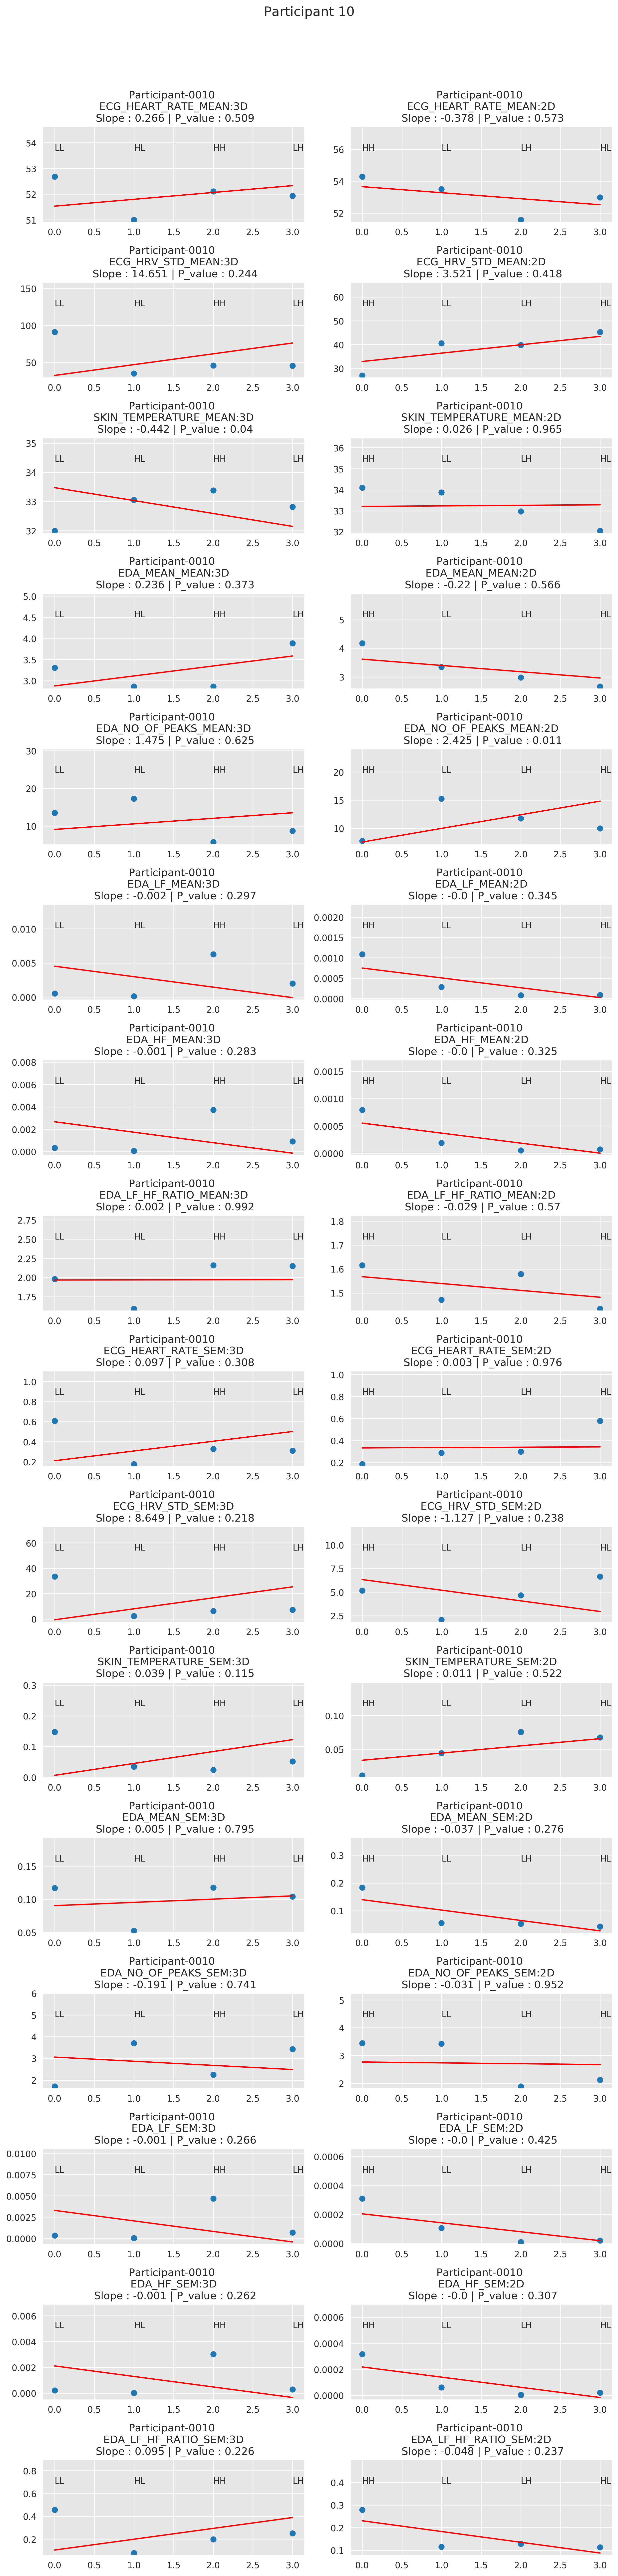

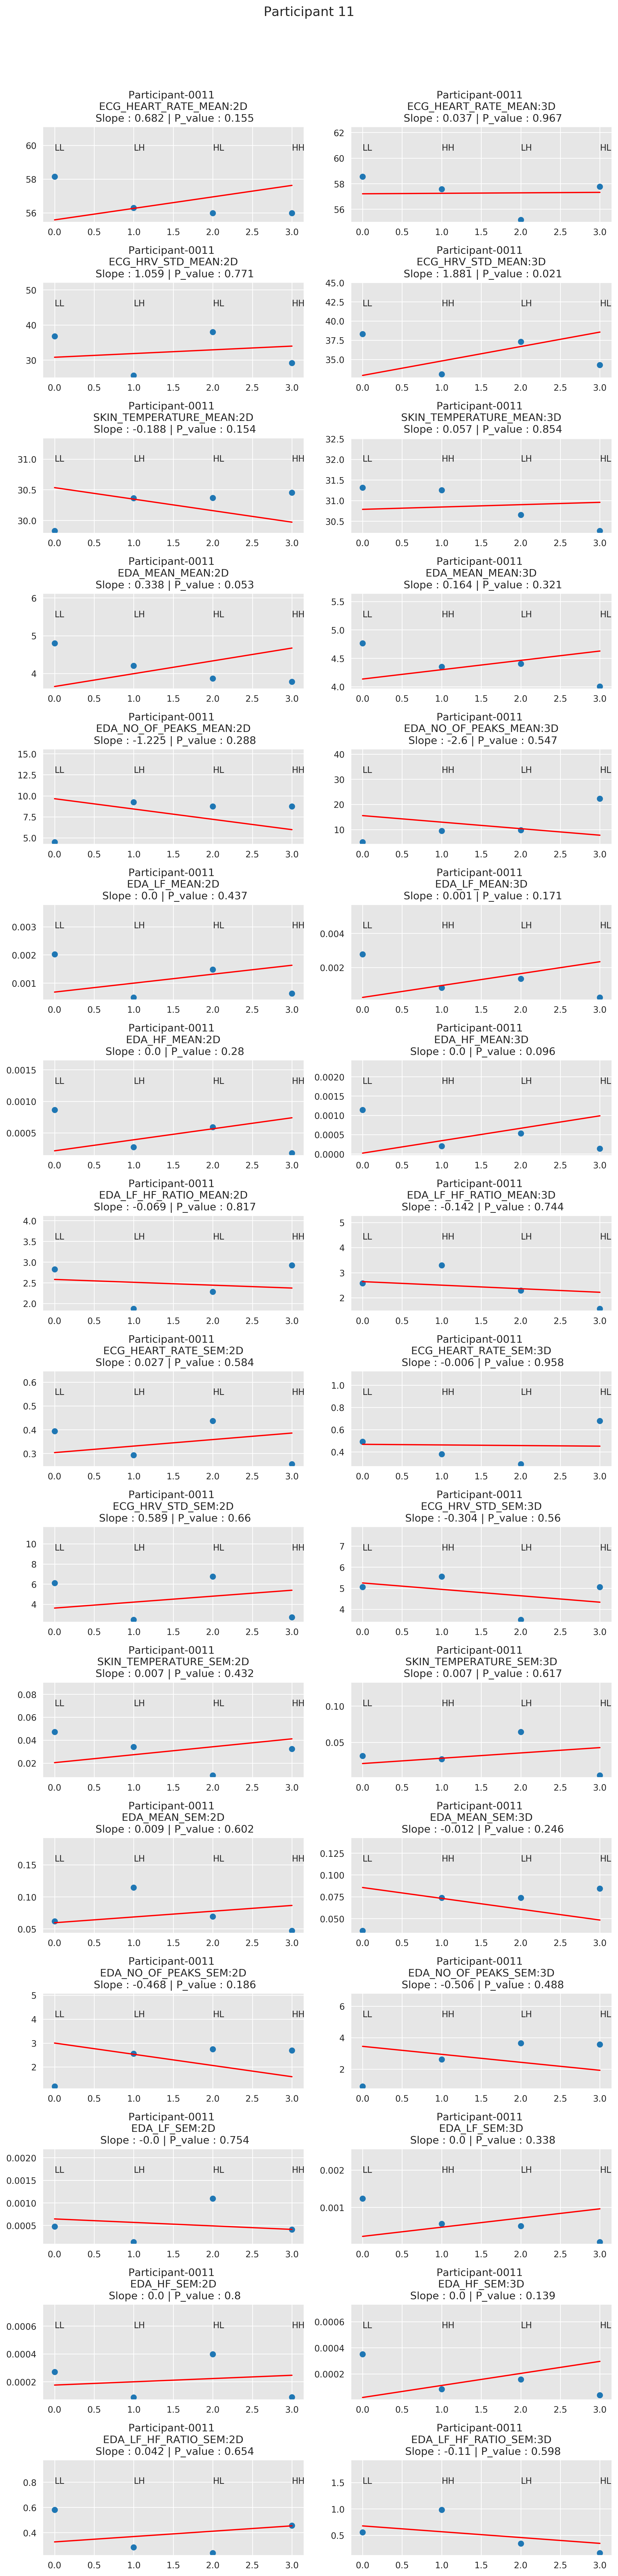

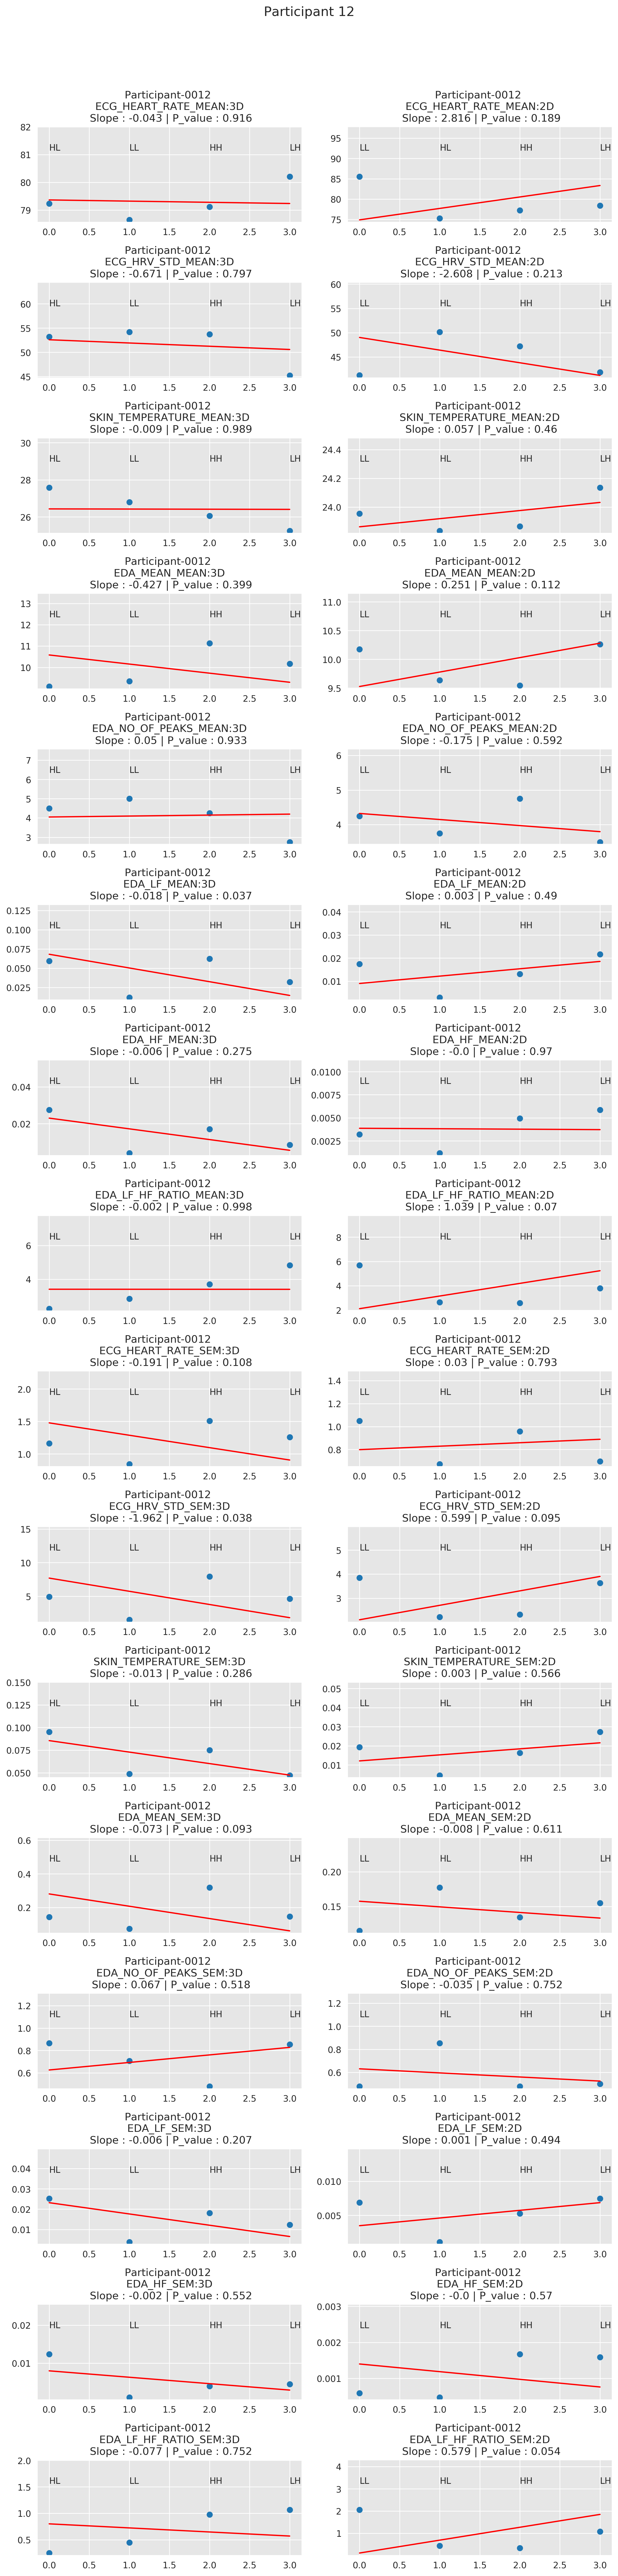

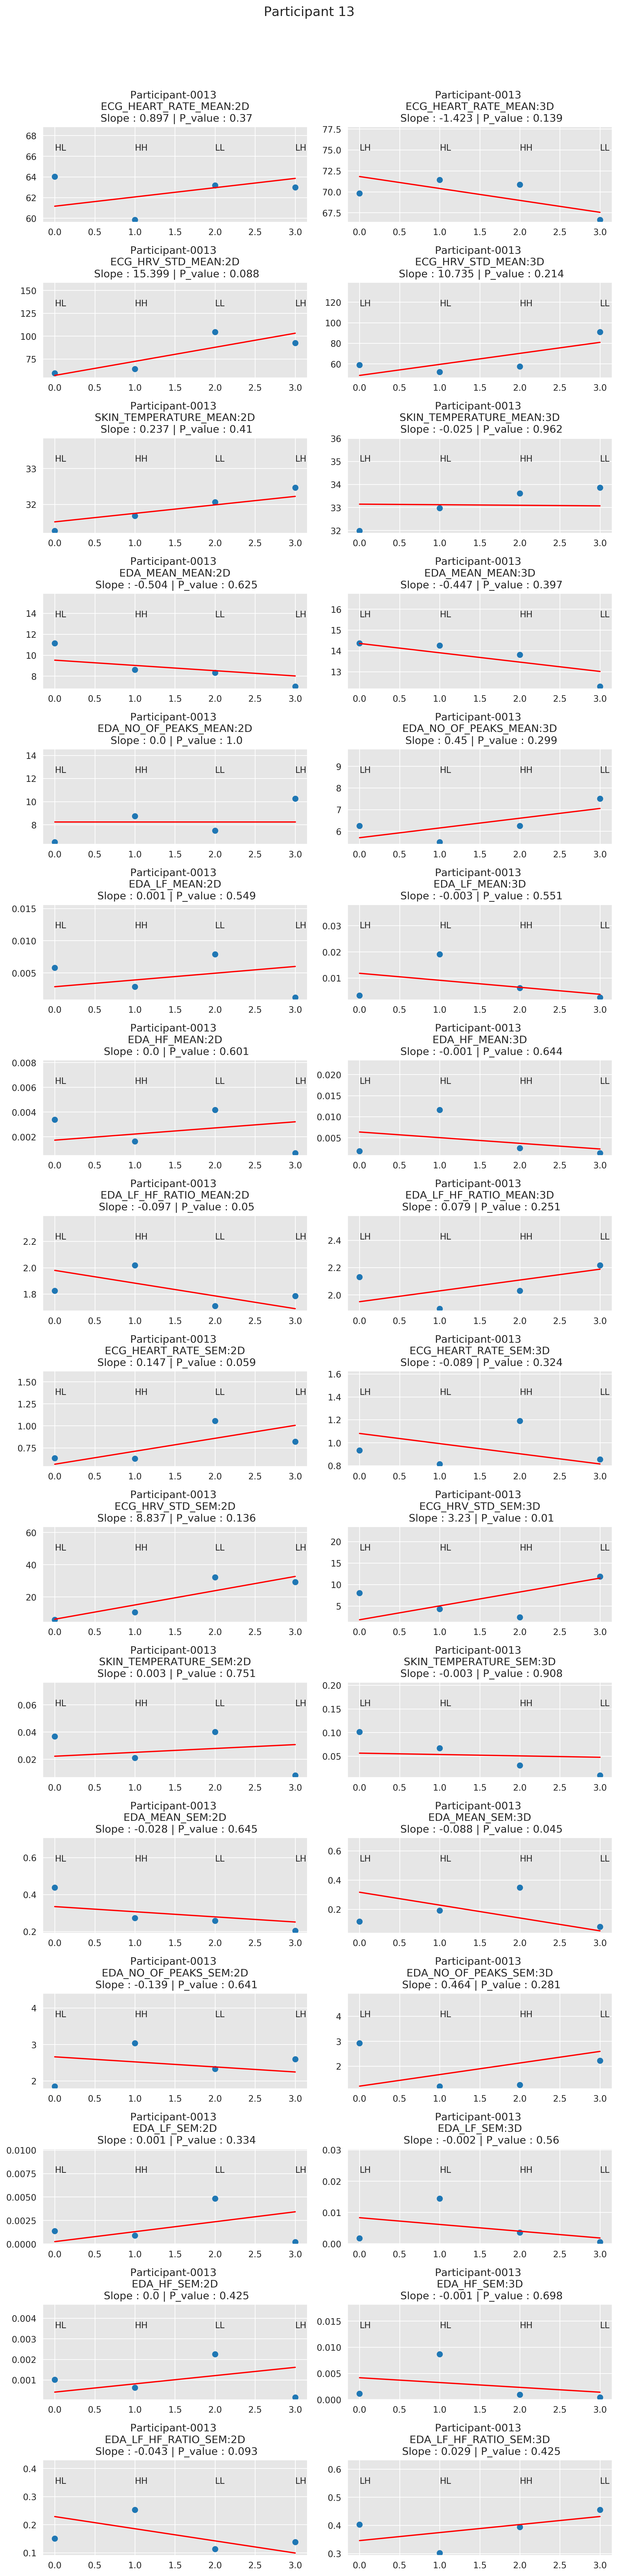

In [63]:
some_parts.groupby(["Participant"]).apply(lambda x: plot_data(x.index.get_level_values("Participant").unique().values,x, slopes))

#### Trend Analysis Both 2D and 3D

In [17]:
def compute_slope_all(participant,data): 
    slopes_df = pd.DataFrame([])
    features = feature_dict.keys()
    flag = True
    for feature in features:
        feature_data = data[[feature]].dropna()
#         dxt = feature_data.index.get_level_values("Datetime")
        dx = np.arange(0,8)
        dy = feature_data[feature].values
        slope_three,intercept_three,_,p_value_three,_ = sc.linregress(dx, dy)
        
        df = pd.DataFrame([[{"slope":slope_three,"intercept":intercept_three,"p_value":p_value_three}]], 
                           columns = [feature])
        if flag:
            slopes_df = df
            flag = False
        else:
            slopes_df = slopes_df.merge(df, how = 'left', right_index = True, left_index = True)
        
    return slopes_df

In [18]:
slopes_all = some_parts.groupby("Participant").apply(lambda x: compute_slope_all(x.index.get_level_values("Participant").unique().values[0],x))

In [19]:
slopes_all.head()

ecg_heart_rate_mean  \
Participant                                                        
10          0  {'slope': -0.23368695619843294, 'intercept': 5...   
11          0  {'slope': 0.21108671168506454, 'intercept': 56...   
12          0  {'slope': 0.3668164313283323, 'intercept': 77....   
13          0  {'slope': 1.3045159269710291, 'intercept': 61....   

                                                ecg_hrv_std_mean  \
Participant                                                        
10          0  {'slope': 5.201067373577848, 'intercept': 27.9...   
11          0  {'slope': 0.9894399536804053, 'intercept': 30....   
12          0  {'slope': 0.8425859778286199, 'intercept': 45....   
13          0  {'slope': 0.2059414567744895, 'intercept': 71....   

                                           skin_temperature_mean  \
Participant                                                        
10          0  {'slope': -0.13237944775808175, 'intercept': 3...   
11          0  {'slope': 0.10244032876989564, 'intercept': 30...   
12          0  {'slope': 0.47629446987189084, 'intercept': 23...   
13          0  {'slope': 0.260954762043275, 'intercept': 31.5...   

                                                   eda_mean_mean  \
Participant                                                        
10          0  {'slope': -0.00990628743204253, 'intercept': 3...   
11          0  {'slope': 0.10097785676464055, 'intercept': 3....   
12          0  {'slope': -0.013430969574421798, 'intercept': ...   
13          0  {'slope': 0.8239039952041578, 'intercept': 8.3...   

                                            eda_no_of_peaks_mean  \
Participant                                                        
10          0  {'slope': 0.4880952380952381, 'intercept': 9.5...   
11          0  {'slope': 0.2708333333333333, 'intercept': 8.7...   
12          0  {'slope': -0.002976190476190476, 'intercept': ...   
13          0  {'slope': -0.30357142857142855, 'intercept': 8...   

                                                     eda_lf_mean  \
Participant                                                        
10          0  {'slope': 0.00013906157571070378, 'intercept':...   
11          0  {'slope': 0.00014594359769602364, 'intercept':...   
12          0  {'slope': 0.0035215588221981006, 'intercept': ...   
13          0  {'slope': 0.0004484687188779788, 'intercept': ...   

                                                     eda_hf_mean  \
Participant                                                        
10          0  {'slope': 5.390417163833555e-05, 'intercept': ...   
11          0  {'slope': 6.39436915536871e-05, 'intercept': 0...   
12          0  {'slope': 0.0013074163410383536, 'intercept': ...   
13          0  {'slope': 0.00025540213025204575, 'intercept':...   

                                            eda_lf_hf_ratio_mean  \
Participant                                                        
10          0  {'slope': 0.08154312603849213, 'intercept': 1....   
11          0  {'slope': -0.033115158480003216, 'intercept': ...   
12          0  {'slope': 0.07066617865041322, 'intercept': 3....   
13          0  {'slope': 0.0427989337764149, 'intercept': 1.8...   

                                              ecg_heart_rate_sem  \
Participant                                                        
10          0  {'slope': 0.015404130903201061, 'intercept': 0...   
11          0  {'slope': 0.024340860219119447, 'intercept': 0...   
12          0  {'slope': 0.047544875339523895, 'intercept': 0...   
13          0  {'slope': 0.03804657699775663, 'intercept': 0....   

                                                 ecg_hrv_std_sem  \
Participant                                                        
10          0  {'slope': 2.366232541635969, 'intercept': 0.21...   
11          0  {'slope': 0.08804990553546406, 'intercept': 4....   
12          0  {'slope': 0.17145862668258807, 'intercept': 3....   
13          0  {'slope':

In [20]:
some_parts['index'] = np.array([np.arange(0,8)]*len(some_parts.index.get_level_values("Participant").unique())).flatten()

/home/camar/.conda/envs/btsrd/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [21]:
def plot_annotation(event_data, event,ax, llim, ulim,):
#     display(event_data)
#     times = event_data.index.get_level_values("Datetime")
#     d_first = list(dxt).index(times[0])
#     d_last = list(dxt).index(times[len(times)-1])
#     ax.axvspan(d_first,d_last+1, color = colors[event], alpha=0.2, zorder=2)
    ax.annotate('{}'.format(event), (event_data['index'].values[0],(ulim + (np.abs(ulim-llim)/2))), rotation=0)

In [26]:
def plot_all_data(participant, data, slopes):
    temp = data.reset_index("Type")
    types = np.array(['', ''])
    types[0] = (temp[temp['type_order']==1]['Type']).values[0]
    types[1] = (temp[temp['type_order']==2]['Type']).values[0]
    types = ['3D' if x =='3' else '2D' for x in types]
    
    feature_names = feature_dict.keys()
    fig, axes = plt.subplots(16,1, figsize = (10,45), dpi = 250)
    ax = axes.flatten()
    events = data.index.get_level_values("context").unique()
    
    

    for i, feature in enumerate(feature_names): 
        feature_data = data[[feature]].dropna()
        feature_data['index'] = np.arange(0,8)
#         dxt = feature_data.index.get_level_values("Datetime")
        dx = np.arange(0,8)
        dy = feature_data[feature].values

        slope, intercept, p_value = slopes.loc(axis = 0)[participant][feature].values[0].values()
        ax[i].plot(dx, dy, 'o')
        ax[i].plot(dx, intercept + slope*dx,  color = 'red')
        llim, ulim = ax[i].get_ylim()
        
        
        index_3d = feature_data.loc(axis = 0)[:,'3D',:,:]['index'].values[0]
        index_2d = feature_data.loc(axis = 0)[:,'2D',:,:]['index'].values[0]

        
        ax[i].axvspan(index_3d,(index_3d+4), color='#ffb8a7',alpha = 0.4, zorder = 1, label='3D')
        ax[i].axvspan(index_2d,(index_2d+4), color='#beedcd',alpha = 0.4, zorder = 1, label='2D')

        colors = {'HH':'#ffb8a7',"HL":'#beedcd','LH':'#e0eb1c','LL':'#59b6eb'}
        for event in events:
            event_data = feature_data.loc(axis = 0)[:,:,event,:]
            event_data.groupby(["Participant","Type"]).apply(lambda x: plot_annotation(x,event, ax[i],
                                                                                              llim, ulim))
            

        ax[i].set_title("Participant-00{} : {} \n  Slope : {} | P_value : {} ".format(participant,feature.upper(),
                                                                      np.round(slope,3),
                                                                      np.round(p_value,3)))
        ax[i].set_ylim([llim,llim+(np.abs(ulim-llim)*2)])
        ax[i].legend()

    plt.suptitle("Participant {}".format(participant), y = 1.02, size = 15)
    plt.tight_layout()


In [ ]:
some_parts.groupby("Participant").apply(lambda x: plot_all_data(x.index.get_level_values("Participant").unique().values[0],
                                                            x, slopes_all))